In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [146]:
pc = pd.read_parquet(r'C:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Desktop\EDA_PC\Data\Raw\train.parquet',engine='fastparquet')

In [147]:
df = pc.copy()

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    object 
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 92.8+ KB


In [149]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [150]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.0
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.6
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.0


In [151]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,355.00
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,379.00
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Linux,2.2kg,677.35
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,745.00
911,87,Dell,Inspiron 7577,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.65kg,1349.00


In [152]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [153]:
df.shape

(912, 13)

In [154]:
df.describe()

,laptop_ID,Price_euros
count,912.000000,912.000000
mean,663.118421,1111.262533
std,380.713558,682.109694
min,1.000000,174.000000
25%,339.750000,598.742500
50%,666.500000,977.000000
75%,985.250000,1472.650000
max,1320.000000,5499.000000


In [155]:
df[df.duplicated()]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros


In [156]:
df_ob = df.select_dtypes('object')
for col in df_ob.columns:
    print(f'==========={col}===========')
    print(f'Numero de unicos: {df[col].nunique()}')
    print(f'Valores Unicos: {df[col].unique()}')
    print('\n')

===========Company===========
Numero de unicos: 19
Valores Unicos: ['Dell' 'Asus' 'HP' 'Toshiba' 'Lenovo' 'Google' 'LG' 'MSI' 'Acer'
 'Mediacom' 'Apple' 'Microsoft' 'Fujitsu' 'Huawei' 'Xiaomi' 'Vero' 'Chuwi'
 'Samsung' 'Razer']


===========Product===========
Numero de unicos: 484
Valores Unicos: ['Inspiron 3179' 'FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon' 'ZBook 15'
 'Pavilion X360' 'Tecra A50-C-1ZV' 'Vostro 5468' '250 G6' 'Latitude 3580'
 'IdeaPad 310-15IKB' 'IdeaPad Y700-15ACZ' 'EliteBook 840' 'Inspiron 5567'
 'Pixelbook (Core' 'VivoBook E201NA' 'Latitude E5570' 'ProBook 650'
 'IdeaPad Y700-15ISK' 'Yoga 500-14ISK' 'Inspiron 5579' 'Vostro 3559'
 'Gram 15Z970' 'Yoga 11e' 'XPS 13' 'Latitude 5480' 'ProBook 450'
 'GP62M Leopard' 'Inspiron 3567' 'Inspiron 5770' 'ThinkPad Yoga'
 'Thinkpad P51' 'Latitude 7280' 'Legion Y720-15IKB' 'Precision M5520'
 'Aspire 3' 'Omen 17-an012dx' 'VivoBook Max' 'E5 774G' 'Zbook 15'
 'Inspiron 3552' 'B51-80 (i5-6200U/8GB/1TB/Radeon' 'SmartBook Edge'
 'IdeaPad 320

In [157]:
df['Inches'] = df['Inches'].astype(float)

In [158]:
df['Ram(GB)'] = df['Ram'].replace('GB','',regex=True)

### Comenzamos con la limpieza de datos de la columna Product.

In [159]:
df['Product'] = df['Product'].str.replace(r'[()\-/]', ' ', regex=True)
 # quitamos caracteres especiales

In [160]:
df['Product'] = df.apply(lambda row: ' '.join([palabra for palabra in row['Product'].split() if palabra not in row['Cpu']]), axis=1)
# Con este lambda quitamos todo lo que esta en la columna CPU de la columna Product

In [161]:
sig = r'\b(\d+GB|\d+TB|FX-\d+|i[3579]-\d{4}\w*|Celeron|Radeon|GeForce|Intel HD|Linux|Chrome|W10|W7|FHD|No|12.3)\b'
df['Product'] = df['Product'].str.replace(sig, '', regex=True).str.strip()
# Quitamos las memorias, procesadores y algunos sistemas operativos

In [162]:
patron = r'\d+(\.\d+)?\"'
df['Product'] = df['Product'].apply(lambda x: re.sub(patron,'',x))
# Quitamos del producto las inchas ya que las tenemos en una columna aparte.

En esta columna no dividimos nada, solo quitamos datos que ya teniamos en otras columnas para simplificarlos.

### Pasamos a la columna TypeName

In [163]:
df['TypeName'] = df['TypeName'].apply(lambda x: 'Convertible' if x == '2 in 1 Convertible' else x )

# Siguiendo el patron de los otros TypeName elinimanos el "2 in 1" del TypeName, para solo usar 1 palabra.

### Columna ScreenResolution:

In [164]:
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
# Separamos la Resolucion.

df['PanelType'] = df['ScreenResolution'].str.findall(r'(IPS Panel|Retina Display|Quad HD\+|Full HD|4K Ultra HD)').str.join(', ')
df['PanelType'] = df['PanelType'].apply(lambda x: 'No penal type' if x == "" else x)
# separamos el tipo de panel

df['Touchscreen'] = df['ScreenResolution'].str.contains(r'Touchscreen', case=False, na=False)
df['Touchscreen'] = df['Touchscreen'].apply(lambda x: 1 if x else 0)
# Transformamos a tipo bool si es touch o no.


In [165]:
df = df[['laptop_ID','Company','Product','TypeName','Inches','Resolution','PanelType','Touchscreen','Cpu'
         ,'Ram(GB)','Memory','Gpu','OpSys','Weight','Price_euros']]
# Ordenamos el DataFrame


Esta columna la separamos en 3: Resolution, PanelType y TouchScreen. El ultimo booleano.

### Columna CPU

In [166]:
pat = r'\b(\d+(?:\.\d+)?)\s*GHz\b'
df['ProcessorSpeed'] = df['Cpu'].str.extract(f'{(pat)}')
df['ProcessorSpeed'] = df['ProcessorSpeed'].apply(lambda x: f'{x}GHz' if x else x)

# Primero extraemos la velocidad del procesador.

In [167]:
df['Cpu'] = df.apply(lambda row: ' '.join([palabra for palabra in row['Cpu'].split() if palabra not in row['ProcessorSpeed']]),axis=1)
# Eliminamos la velocidad de la columna Cpu

In [168]:
# Extraemos el tipo de procesador (i3, i5, i7, etc.)
df['ProcessorType'] = df['Cpu'].str.extract(r'(i3|i5|i7|i9|AMD Ryzen|AMD A4-Series|AMD A9-Series|AMD E-Series|AMD A6-Series|AMD|Xeon|FX|Celeron|Pentium|Atom|Cortex|M)')

In [169]:
df['Core'] = df['Cpu'].str.extract(r'\b(Dual|Quad|Core)')
df['Core'] = df['Core'].map({'Core':0,'Dual':2,'Quad':4})
df['Core'] = df['Core'].fillna(0) 
# Extraemos los nucleos de la columna Cpu, y les asignamos un numero.

In [170]:
def obtener_identificador(cpu):
    if not isinstance(cpu, str):
        return None
    palabras = cpu.split()
    if not palabras:
        return None
    if len(palabras[-1]) > 2:
        return palabras[-1]
    elif len(palabras) >= 2:
        return palabras[-2]
    else:
        return None
    
    # Descubrimos que la mayoria de veces, la palabra final es el modelo de identificacion. Creamos esta funcion para extraerla.

In [171]:
df['ModelIdentifier'] = df['Cpu'].apply(obtener_identificador) # Aplicamos la funcion
df['ModelIdentifier'] = df['ModelIdentifier'].apply(lambda x: 'No ModelIDentifier' if x == 'M' or x == 'Core' else x)

# Quitamos 'M' y 'Core' que no corresponden a modelos de identificacion.

La columna Cpu la dividimos en 4: ProcessorSpeed, ProcessorType, ModelIdentifier y Core. Core le pusimos valor a los que especificaban el nuemro de nucleos, ejemplo: los que solo tienen 'core', no especifica esos pusimos 0, dual con 2 y Quad 4.

In [172]:
df = df[['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Resolution',
       'PanelType', 'Touchscreen', 'ProcessorType','ModelIdentifier','Core','ProcessorSpeed', 'Ram(GB)', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price_euros']]

# Ordenamos el DataFrame

### Columna Memory

In [173]:
df['Memory 1'] = df['Memory'].str.split('+').str[0]
# separamos en una lista y nos quedamos con el primer elemento para Memory 1
df['Memory 2'] = df['Memory'].str.split('+').str[1].fillna('No Memory 2')
# separamos en una lista y nos quedamos con el segundo elemento para Memory 2

In [175]:
df['Memory 1(GB)'] = df['Memory 1'].str.replace(r'[a-zA-Z]','',regex=True).str.strip().astype(float)
df['Memory 1(GB)'] = df['Memory 1(GB)'].apply(lambda x: x*1000 if x == 1 else x)
# df['Memory 2(GB)'] = df['Memory 2'].str.replace(r'[a-zA-Z]','',regex=True)

In [176]:
df = df[['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Resolution',
       'PanelType', 'Touchscreen', 'ProcessorType','ModelIdentifier','Core','ProcessorSpeed', 'Ram(GB)', 'Memory 1(GB)','Memory 2', 'Gpu', 'OpSys',
       'Weight', 'Price_euros']]

In [177]:
df['Memory 1(GB)'].unique()

array([ 128., 1000.,  256.,  500.,  512.,    2.,   64.,   32.,   16.,
          8.,  180.,  508.,  240.])

La columna Memory la dividimos en 2: Memory 1 y Memory 2. Los pc que no tenian Memory 2 los llenamos con "No Memory 2"

### Columna Gpu

In [99]:
df.loc[:,'Gpu'] = df['Gpu'].str.replace(r'^(Intel|AMD)\s*', '', case=False, regex=True).str.strip()
# Quitamos Intel y AMD de la columna Gpu debido a que este dato lo tenemos en otra columna.

df[['GpuBrand', 'GpuModel']] = df['Gpu'].str.extract(r'([A-Za-z]+(?:\s+[A-Za-z]+)*)\s*([\d\w]+)?')
# Separamos entre marca y modelo la columna GPU.
df['GpuModel'] = df['GpuModel'].fillna('No Specified')

In [100]:
df = df[['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Resolution',
       'PanelType', 'Touchscreen', 'ProcessorType','ModelIdentifier','Core','ProcessorSpeed', 
       'Ram', 'Memory 1','Memory 2', 'GpuBrand','GpuModel', 'OpSys',
       'Weight', 'Price_euros']]

La columna Gpu la dividimos en 2: GpuBrand y GpuModel. Marca y modelo repsectivamente.

### Columna OpSys

In [101]:
df['OpSys'] = df['OpSys'].str.replace(r'(10|10\s*S|7|X)\s*$', '', regex=True).str.strip()
df['OpSys'] = df['OpSys'].str.replace('macOS','Mac OS')

In [102]:
df['Weight(KG)'] = df['Weight'].replace('kg','',regex=True)
df['Weight(KG)'] = df['Weight(KG)'].astype(float)

# Le quitamos kg a la columna Weight para un mejor analisis.

In [103]:
df = df[['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Resolution',
       'PanelType', 'Touchscreen', 'ProcessorType','ModelIdentifier','Core','ProcessorSpeed', 
       'Ram', 'Memory 1','Memory 2', 'GpuBrand','GpuModel', 'OpSys',
       'Weight(KG)', 'Price_euros']]

Simplemente borramos Las versiones, creemos que el analisis seria mejor asi.

## Terminando con la limpieza y future engineer, nos quedamos con estas variables.

|Variable|Descripcion|
|----|----|
|Laptop_ID|Indice.|
|Company|Compañia fabricante.|
|Product|Nombre del PC.|
|TypeName|Tipo de PC.|
|Inches|Tamaño de pantalla.|
|Resolution|Resolucion de pantalla.|
|PanelType|Tipo de panel.|
|TouchScreen|Tipo Bool, si la pantalla es touch o no.|
|ProcessorType|Tipo de procesador.|
|ModelIdentifier|Identificador del modelo.|
|Core|Cantidad de Nucleos.|
|ProcessorSpeed|Velocidad de Procesador.|
|Ram|Memoria Ram.|
|Memory 1|Memoria Nro 1.|
|Memory 2|Memoria Nro 2.|
|GpuBrand|Marca de Gpu.|
|GpuModel|Modelo de Gpu.|
|OpSys|Sistema operativo.|
|Weight|Peso del PC.|
|Price_euros|Precio de PC.|


## Analisis Univariante.

In [104]:
os.chdir(r'C:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Desktop\Analisis_datos_eda\scripts')

In [105]:
from ClaseAbdon import DataFrameAnalyzer
# Importo mi clase

In [106]:
clase = DataFrameAnalyzer(df)

In [107]:
clase.resumen()

,Columna,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
0,laptop_ID,int64,912,100.00,0,0.0,Índice Numérico
1,Company,object,19,2.08,0,0.0,Categórica Nominal
2,Product,object,467,51.21,0,0.0,Categórica Nominal
3,TypeName,object,6,0.66,0,0.0,Categórica Nominal
4,Inches,float64,18,1.97,0,0.0,Numérica Continua
5,Resolution,object,15,1.64,0,0.0,Categórica Nominal
6,PanelType,object,9,0.99,0,0.0,Categórica Nominal
7,Touchscreen,int64,2,0.22,0,0.0,Binaria
8,ProcessorType,object,15,1.64,0,0.0,Categórica Nominal
9,ModelIdentifier,object,80,8.77,0,0.0,Índice Numérico


Podemos observar que hay una alta cardinalidad en el Nombre de producto y en el precio.
En el resto de variables hay una cardinalidad baja, es normal porque muchos PC tienen especificaciones "parecidas".

In [108]:
clase.describe_numeric()

,count,mean,median,mode,std_dev,min,25%,50%,75%,max,skewness,kurtosis
Inches,912.0,15.007785,15.60,15.6,1.454677,10.10,14.0000,15.60,15.60,18.4,-0.449882,-0.114037
Touchscreen,912.0,0.152412,0.00,0.0,0.359617,0.00,0.0000,0.00,0.00,1.0,1.937347,1.757160
Core,912.0,0.252193,0.00,0.0,0.828946,0.00,0.0000,0.00,0.00,4.0,3.429566,11.213496
Weight(KG),912.0,2.045422,2.05,2.2,0.673665,0.69,1.5000,2.05,2.33,4.7,1.094268,2.286364
Price_euros,912.0,1111.262533,977.00,499.0,682.109694,174.00,598.7425,977.00,1472.65,5499.0,1.452447,3.738752


Poco que mirar en las variables numericas, touchscreen es tipo bool y core "Numerica discreta". 
Con respecto al precio vemos que la mediana y la media estan relativamente "cerca", la moda es 499 y tiene una STD un poco elevada. lo que los precios varian considerablemente.

In [109]:
clase.describe_categorical()

,unique_values,most_frequent,frequency,proportion
Company,19,Dell,214,23.46
Product,467,XPS 13,21,2.30
TypeName,6,Notebook,498,54.61
Resolution,15,1920x1080,588,64.47
PanelType,9,Full HD,395,43.31
ProcessorType,15,i7,362,39.69
ModelIdentifier,80,7200U,139,15.24
ProcessorSpeed,29,2.5GHz,207,22.70
Ram,9,8GB,436,47.81
Memory 1,28,256GB SSD,282,30.92


En este DF vemos que la compañia Dell es la que mas frecuenta entre las marcas. El producto "XPS 13" el mas frecuente entre ellos, el sistema operativo mas frecuente es Window.. etc.

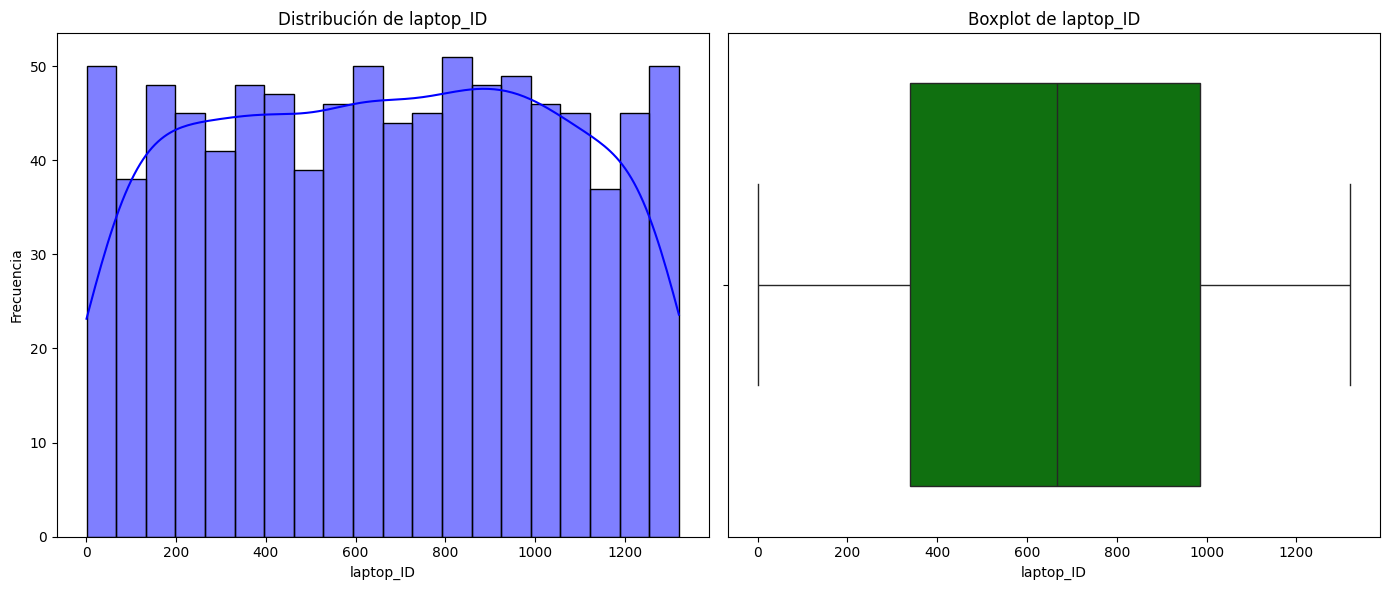

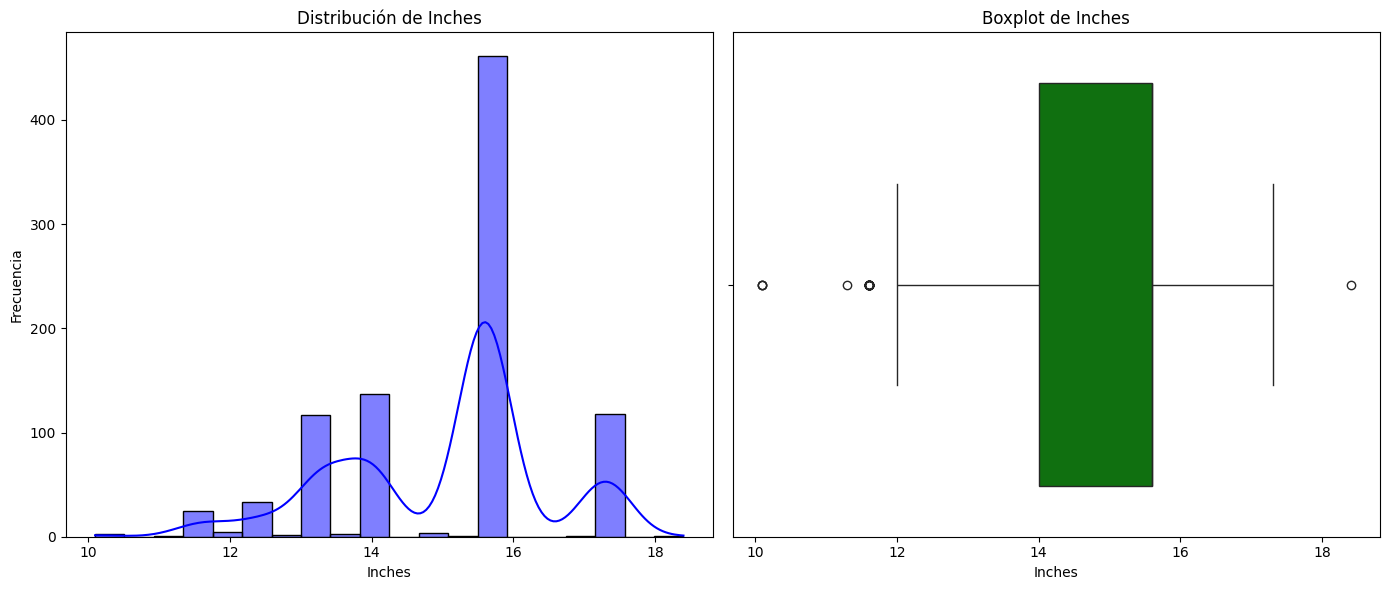

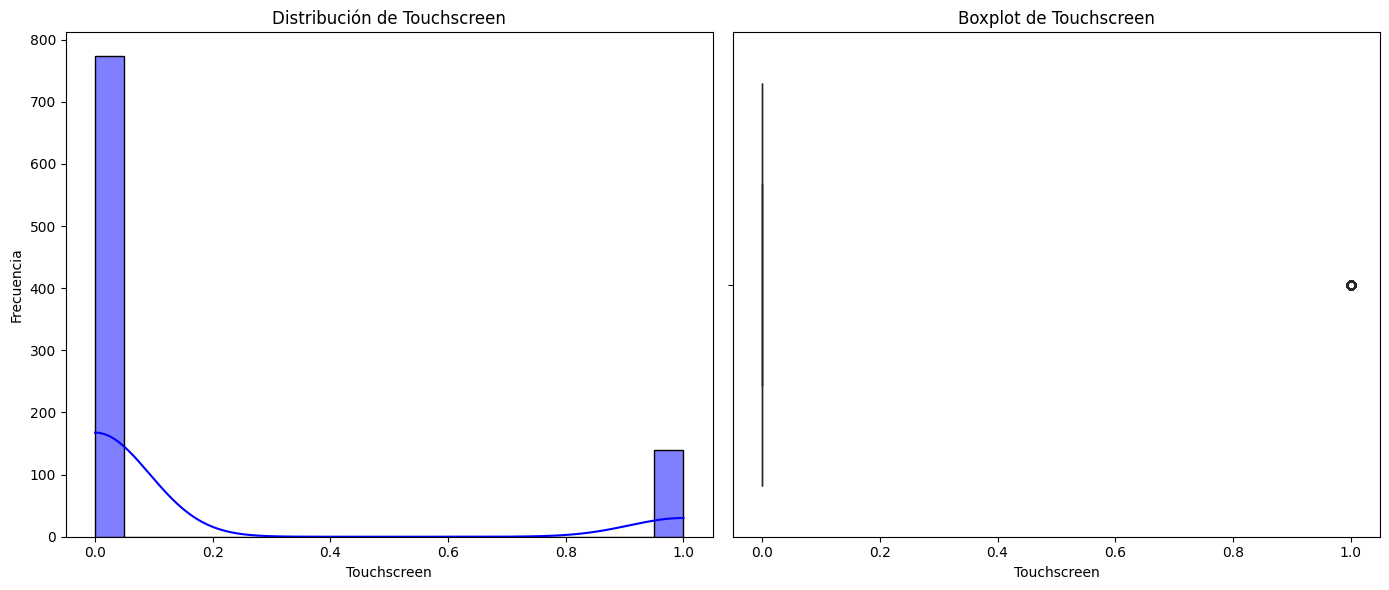

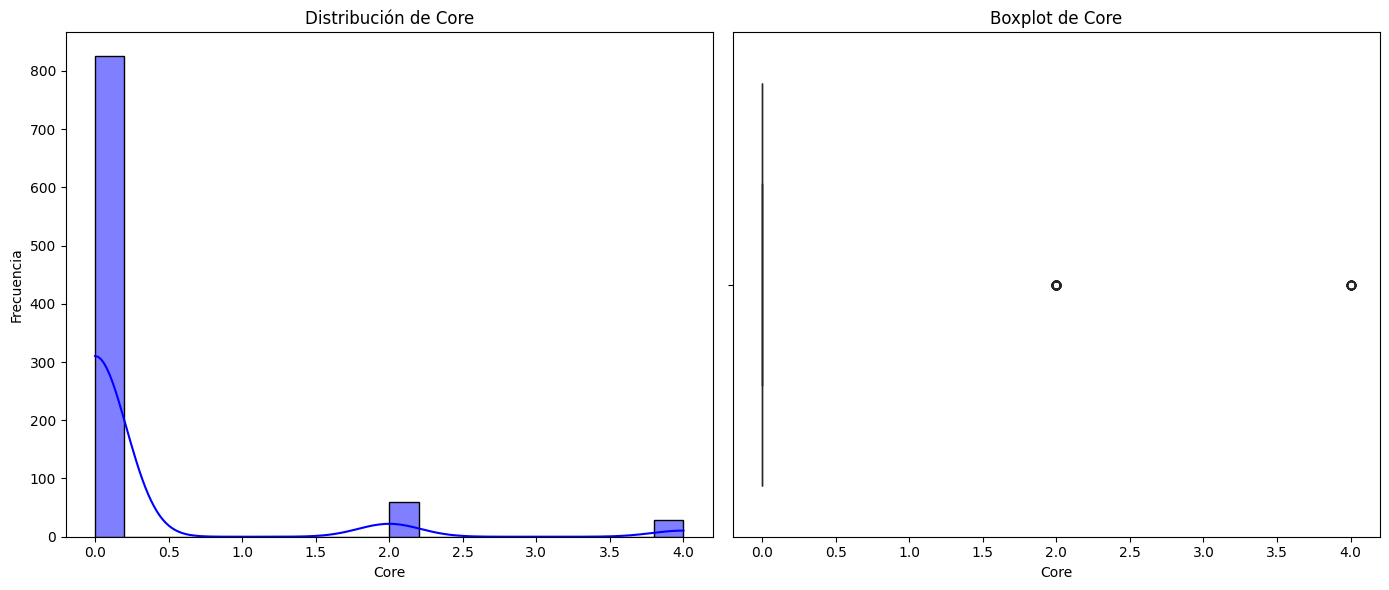

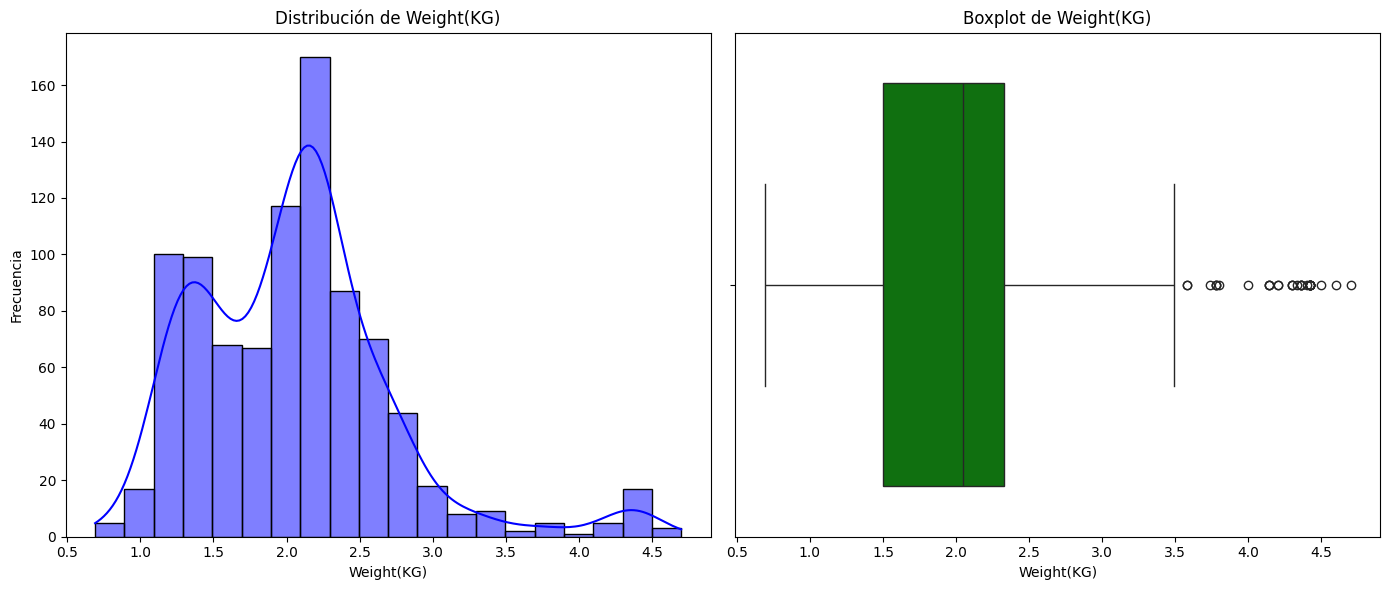

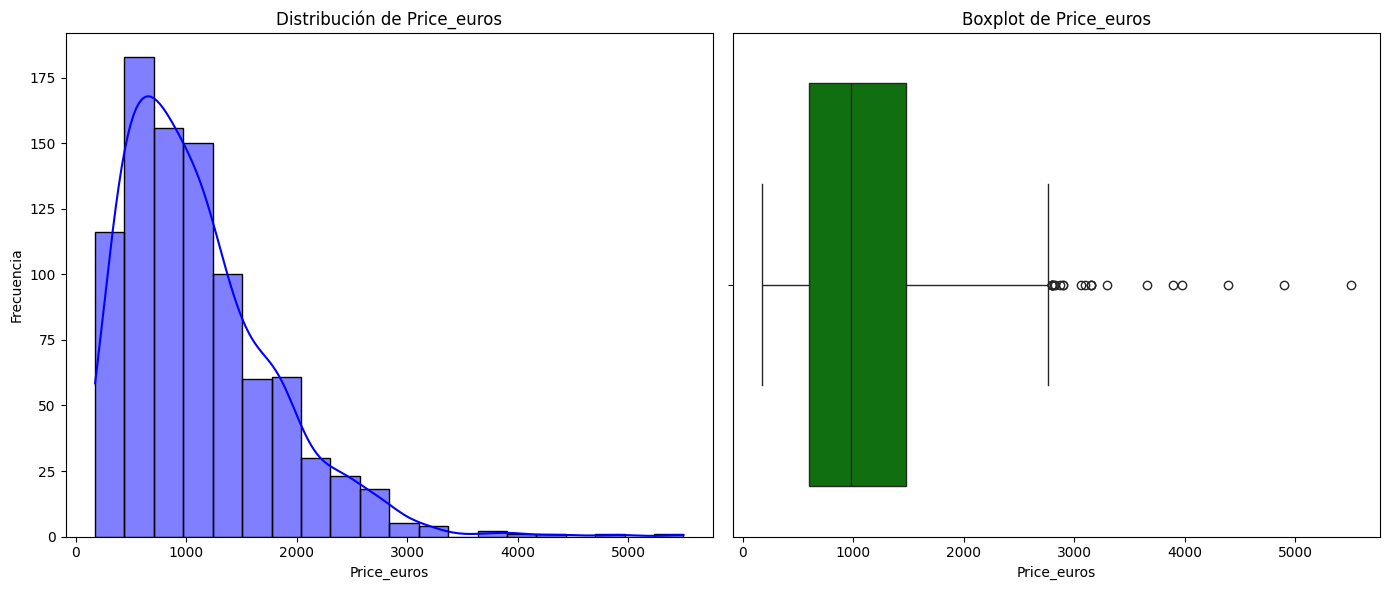

In [110]:
clase.plot_numeric()

In [111]:
Q1_price = df['Price_euros'].quantile(0.25)
Q3_price = df['Price_euros'].quantile(0.75)
IQR_price = Q3_price - Q1_price

upper_limit_price = Q3_price + 1.5 * IQR_price

# Identificar valores fuera del rango IQR
outl_price = df[df['Price_euros'] > upper_limit_price]
outl_price[['Company','Product','Price_euros']]

,Company,Product,Price_euros
83,Lenovo,Thinkpad Yoga,2824.00
132,Toshiba,Portege X30 D 10L,2799.00
183,Lenovo,Thinkpad P51,4899.00
256,HP,ZBook 17,2899.00
258,Dell,Alienware 17,3147.37
311,MSI,GT80S 6QF 074US,2799.00
354,Dell,Alienware 17,3154.00
462,Dell,Alienware 15,2813.75
480,Dell,Alienware 17,2868.99
510,HP,Zbook 17,4389.00


En la variable de precios vemos que hay ciertos outliers, como vimos anteriormente el max superaba los 5000€. Es normal que existan PC mas costosos que otros.

In [112]:
Q1_weight = df['Weight(KG)'].quantile(0.25)
Q3_weight = df['Weight(KG)'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

upper_limit_weight = Q3_weight + 1.5 * IQR_weight

# Identificar valores fuera del rango IQR
outl_weight = df[df['Weight(KG)'] > upper_limit_weight]
outl_weight[['Company','Product','Weight(KG)']]

,Company,Product,Weight(KG)
35,HP,Omen 17 an012dx,3.74
75,MSI,GT73VR Titan,4.14
249,Asus,G701VO IH74K 2x,3.58
251,Acer,Predator 17,4.20
258,Dell,Alienware 17,4.42
264,Dell,Alienware 17,4.42
311,MSI,GT80S 6QF 074US,4.40
318,Dell,Alienware 17,4.36
323,Dell,Alienware 17,4.36
354,Dell,Alienware 17,4.36


En la columna weigh tenemos estos outliers, Alienware 17 es el pc que mas se repite en los outliers.

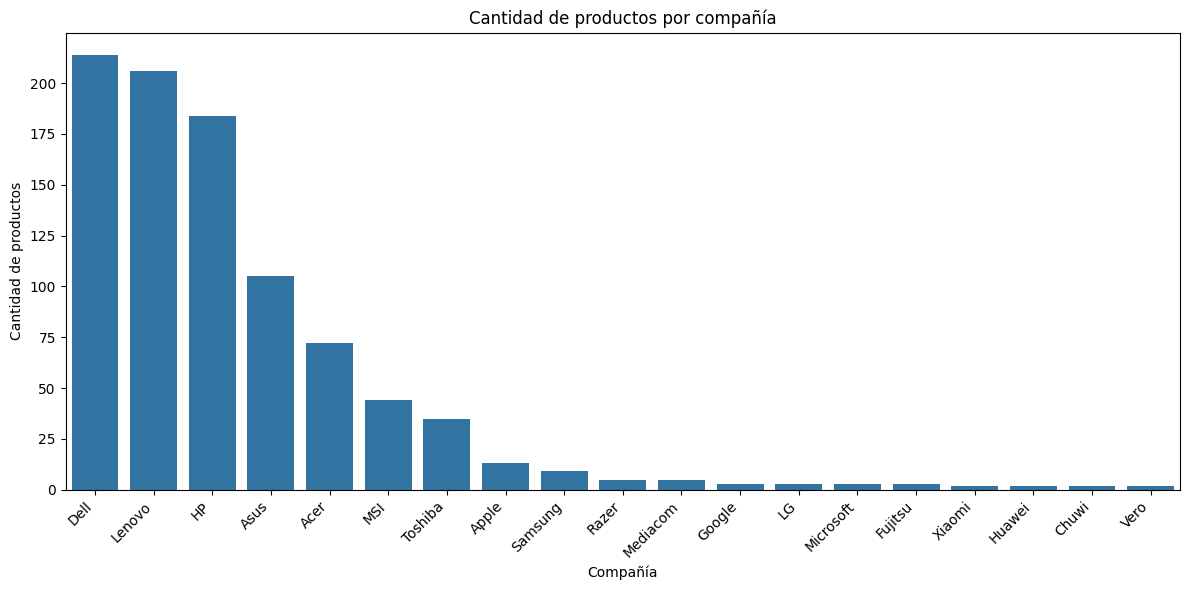

In [113]:
company_counts = df['Company'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=company_counts.index, y=company_counts.values)
plt.title('Cantidad de productos por compañía')
plt.xlabel('Compañía')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observamos que Dell, Lenovo y HP dominan entre las demas compañias.

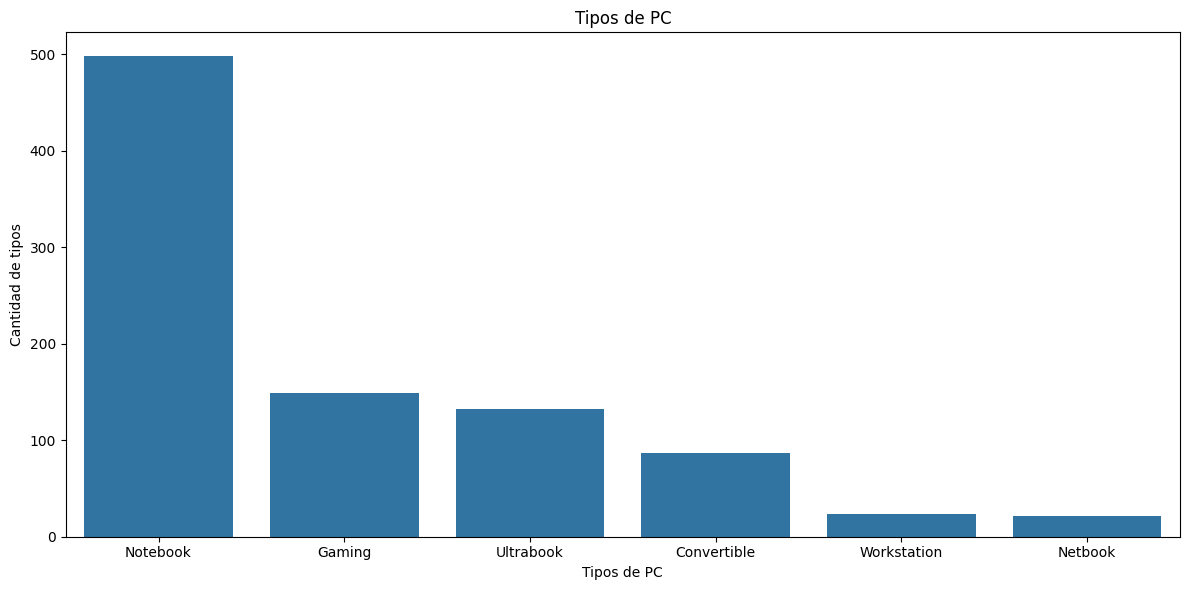

In [114]:
type_counts = df['TypeName'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Tipos de PC')
plt.xlabel('Tipos de PC')
plt.ylabel('Cantidad de tipos')
plt.tight_layout()
plt.show()

Vemos que los tipo Notebook son los que mayormente hay.

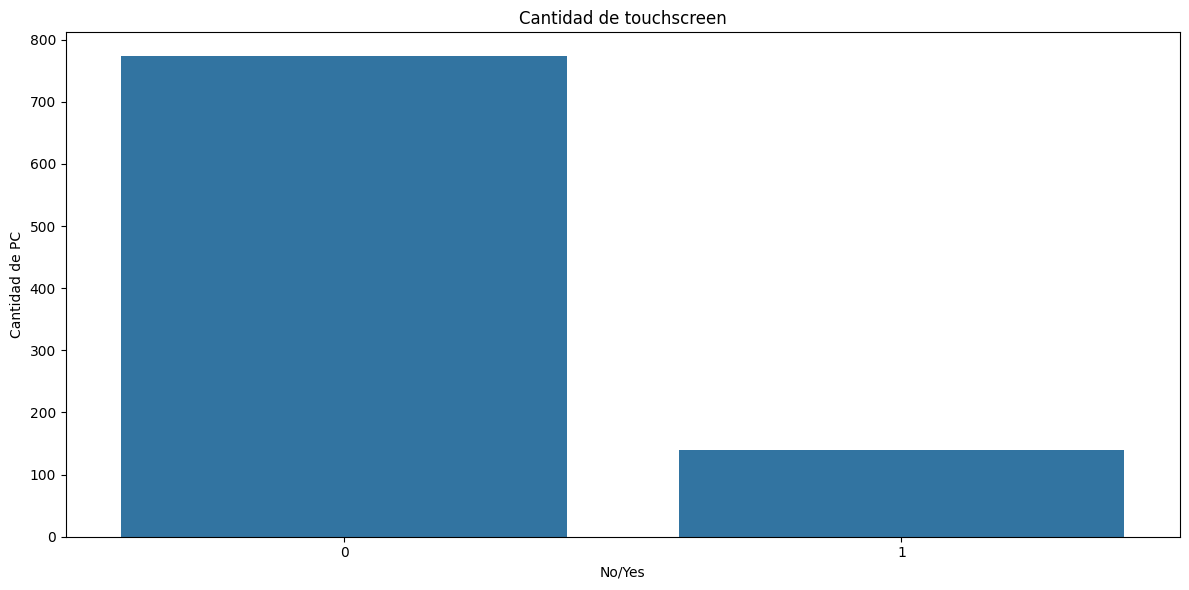

In [115]:
touch_counts = df['Touchscreen'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.title('Cantidad de touchscreen')
plt.xlabel('No/Yes')
plt.ylabel('Cantidad de PC')
plt.tight_layout()
plt.show()

Vemos que hay gran diferencia entre los PC que no tienen pantalla tactil y los que si.

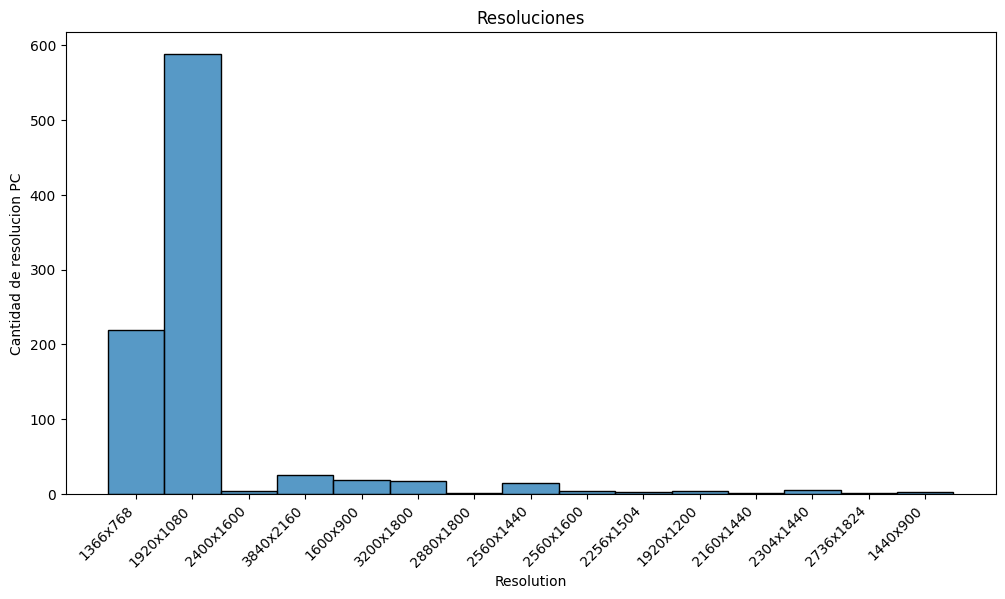

In [116]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Resolution'], discrete=True, kde=False)
plt.title('Resoluciones')
plt.ylabel('Cantidad de resolucion PC')
plt.xticks(rotation=45, ha='right')
plt.show()

La resolucion 1920X1080, es la mas comun entre estos pc.

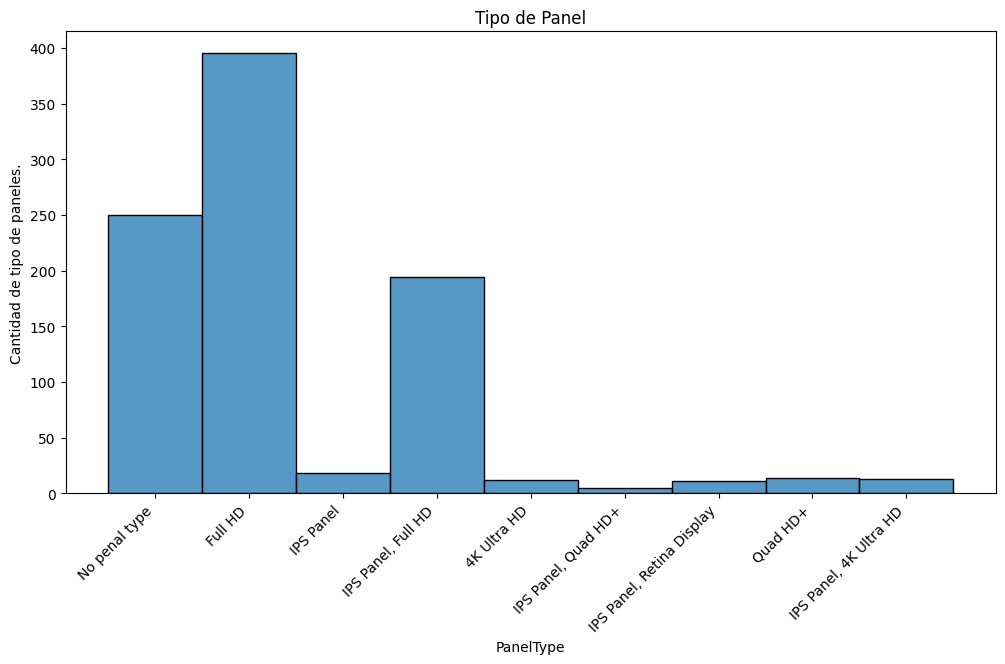

In [117]:
plt.figure(figsize=(12, 6))
sns.histplot(df['PanelType'], discrete=True, kde=False)
plt.title('Tipo de Panel')
plt.ylabel('Cantidad de tipo de paneles.')
plt.xticks(rotation=45, ha='right')

plt.show()

El panel Full HD, el ,as comun entre los pc.

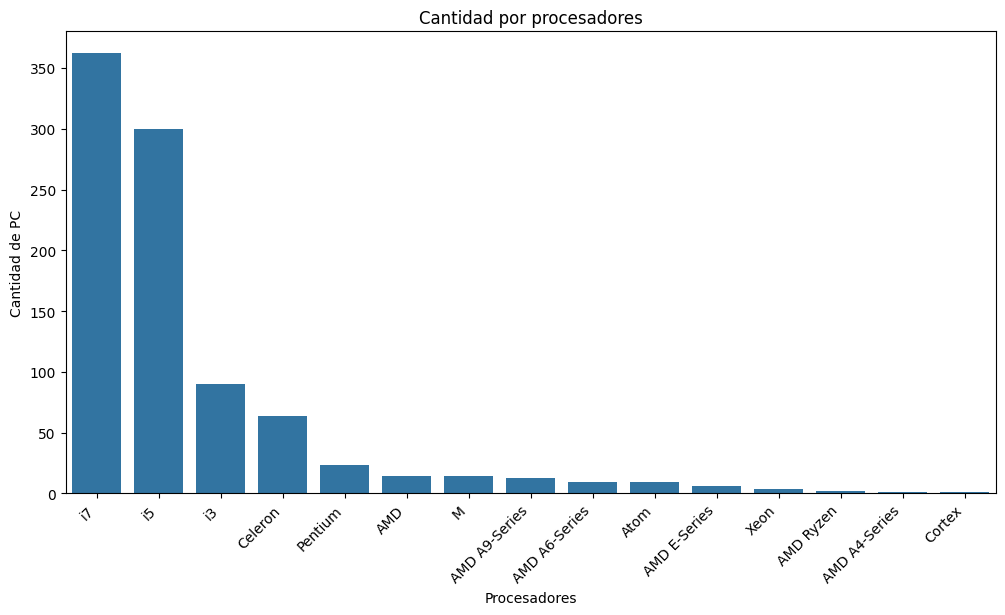

In [118]:
proce_counts = df['ProcessorType'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=proce_counts.index, y=proce_counts.values)
plt.title('Cantidad por procesadores')
plt.xlabel('Procesadores')
plt.ylabel('Cantidad de PC')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

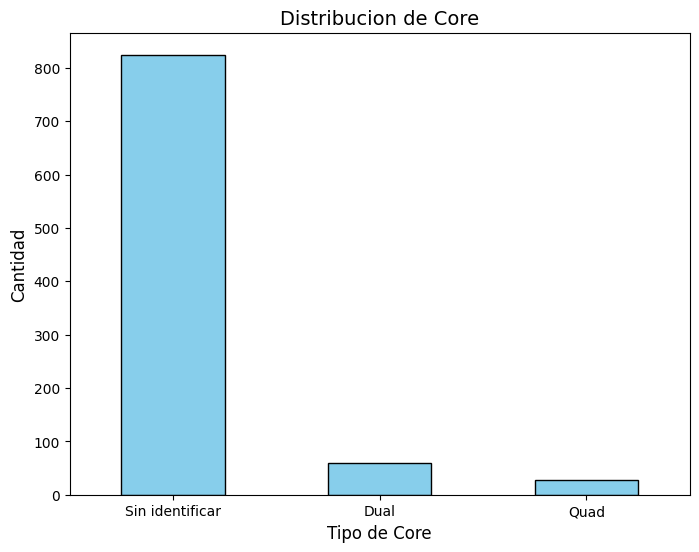

In [119]:
core = df['Core'].value_counts()
core.index = core.index.map({0: 'Sin identificar', 2: 'Dual', 4: 'Quad'})

plt.figure(figsize=(8, 6))
core.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribucion de Core', fontsize=14)
plt.xlabel('Tipo de Core', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Solo tenemos unos pocos Cores especificados, nos pueden servir en un futuro para poder hacer comparaciones entre laptops.

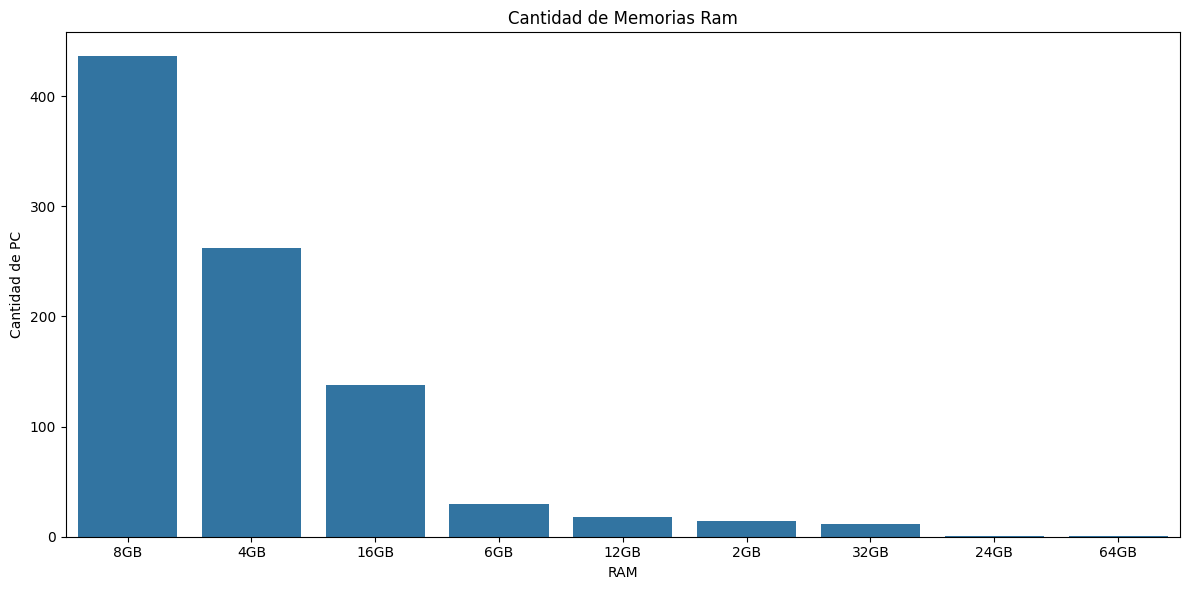

In [120]:
ram_counts = df['Ram'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=ram_counts.index, y=ram_counts.values)
plt.title('Cantidad de Memorias Ram')
plt.xlabel('RAM')
plt.ylabel('Cantidad de PC')
plt.tight_layout()
plt.show()

Para la sorpresa de nadia.. La de 8GB es la mas frecuente entre los 912 pc.

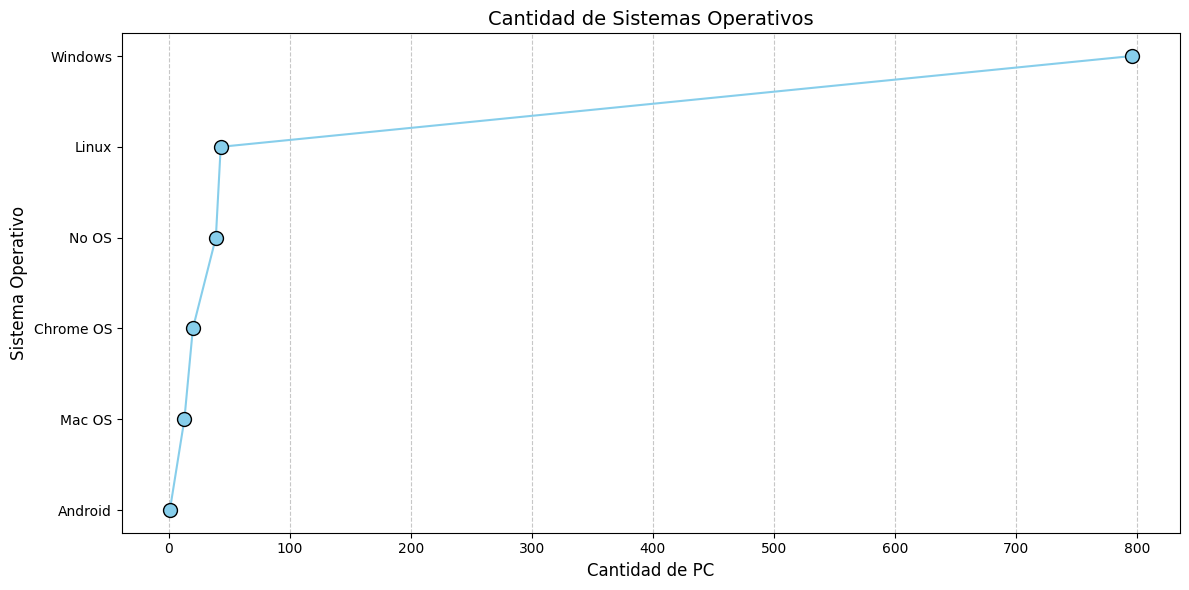

In [121]:
op_counts = df['OpSys'].value_counts(ascending=True)
plt.figure(figsize=(12, 6))
plt.plot(
    op_counts.values, 
    op_counts.index, 
    'o-', color='skyblue', markersize=10, markeredgecolor='black'
)

plt.title('Cantidad de Sistemas Operativos', fontsize=14)
plt.xlabel('Cantidad de PC', fontsize=12)
plt.ylabel('Sistema Operativo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
pc

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.00
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.00
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.00
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.60
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,355.00
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,379.00
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Linux,2.2kg,677.35
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,745.00


In [123]:
df

,laptop_ID,Company,Product,TypeName,Inches,Resolution,PanelType,Touchscreen,ProcessorType,ModelIdentifier,Core,ProcessorSpeed,Ram,Memory 1,Memory 2,GpuBrand,GpuModel,OpSys,Weight(KG),Price_euros
0,599,Dell,Inspiron 3179,Convertible,11.6,1366x768,No penal type,1,M,7Y30,0.0,1.0GHz,4GB,128GB SSD,No Memory 2,HD Graphics,615,Windows,1.39,603.00
1,92,Asus,FX550IK DM018T,Gaming,15.6,1920x1080,Full HD,0,AMD,9830P,0.0,3GHz,8GB,1TB HDD,No Memory 2,Radeon RX,560,Windows,2.45,699.00
2,744,HP,ZBook 15,Workstation,15.6,1920x1080,Full HD,0,i7,7700HQ,0.0,2.8GHz,16GB,256GB SSD,No Memory 2,Nvidia Quadro M,2200,Windows,2.60,2419.00
3,729,HP,Pavilion X360,Convertible,13.3,1366x768,IPS Panel,1,i5,7200U,0.0,2.5GHz,8GB,256GB SSD,No Memory 2,HD Graphics,620,Windows,1.58,836.60
4,957,Toshiba,Tecra A50 1ZV,Notebook,15.6,1366x768,No penal type,0,i5,6200U,0.0,2.3GHz,8GB,256GB SSD,No Memory 2,HD Graphics,520,Windows,2.20,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,1366x768,IPS Panel,0,Celeron,N3060,2.0,1.6GHz,4GB,32GB Flash Storage,No Memory 2,HD Graphics,400,Chrome OS,1.35,355.00
908,626,Acer,CB5 132T C9KK,Convertible,11.6,1366x768,IPS Panel,1,Celeron,N3160,4.0,1.6GHz,4GB,32GB Flash Storage,No Memory 2,HD Graphics,400,Chrome OS,1.25,379.00
909,225,Dell,Inspiron 3576,Notebook,15.6,1920x1080,Full HD,0,i5,8250U,0.0,1.6GHz,8GB,256GB SSD,No Memory 2,Radeon,520,Linux,2.20,677.35
910,17,Dell,Inspiron 3567,Notebook,15.6,1920x1080,Full HD,0,i7,7500U,0.0,2.7GHz,8GB,256GB SSD,No Memory 2,Radeon R,5,Windows,2.20,745.00


Terminamos con que WINDOWS es el sistema operativo mas comun entre todos los pc.